# Machine Learning com Anaconda - Marcus Oliveira
## Explorando as Taxas de Sobrevivência do Titanic

# Importando Bibliotecas e Tabelas

In [147]:
import numpy as np
import pandas as pd

# Código de visualização de dados do RMS Titanic 
from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

# Carregar o dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Exibir as primeiras entradas dos dados do RMS Titanic
display(full_data.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Modificando Tabelas

In [148]:
# Armazenar 'Survived' em uma nova variável e remover do conjunto de dados
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Mostrar o novo conjunto de dados com 'Survived' removido
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Criação de Metricas

In [149]:
def accuracy_score(truth, pred):
    """ Devolver a medida da precisão para um conjunto de valores reais e estimativas. """
    
    # Certificar-se de que há o mesmo número de valores reais e estimativas
    if len(truth) == len(pred): 
        
        # Calcular e devolver a precisão como uma porcentagem
        return "Estimativas têm uma precisão de {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Número de estimativas não bate com o número de resultados!"
    
# Testar a função 'accuracy_score'
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Estimativas têm uma precisão de 60.00%.


# Começando a criação de modelos

In [151]:
def predictions_0(data):
    """ Modelo sem atributos. Sempre estima que o passageiro não sobreviveu. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Prever a sobrevivência do 'passageiro'
        predictions.append(0)
    
    # Devolver nosso modelo
    return pd.Series(predictions)

# Fazer as estimativas
predictions = predictions_0(data)

# Iniciando as Previsões

In [152]:
print accuracy_score(outcomes, predictions)

Estimativas têm uma precisão de 61.62%.


# Graficos Personalizados

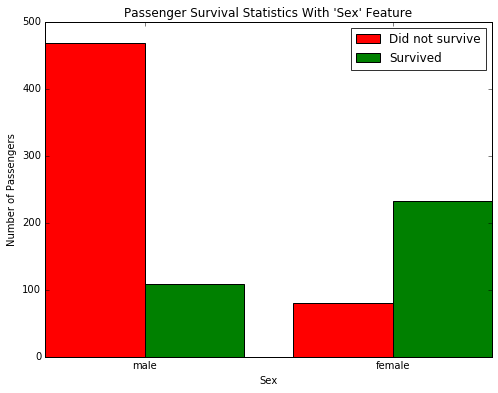

In [153]:
survival_stats(data, outcomes, 'Sex')

# Implementando Variaveis
Examinando as estatísticas de sobrevivência, a grande maioria de homens não sobreviveu ao naufrágio. Entretanto, a maioria das mulheres *sobreviveu* ao naufrágio.

In [154]:
def predictions_1(data):
    
    predictions = []
    for _, passenger in data.iterrows(): 
        
        if(passenger['Sex'] == 'female') :
            predictions.append(1)
        else :
            predictions.append(0)
    
    # Devolver estimativas
    return pd.Series(predictions)

# Fazer as estimativas
predictions = predictions_1(data)


# Aprimorando as Estimativas

In [155]:
print accuracy_score(outcomes, predictions)

Estimativas têm uma precisão de 78.68%.


# Usando a Intuição Atravez dos Dados

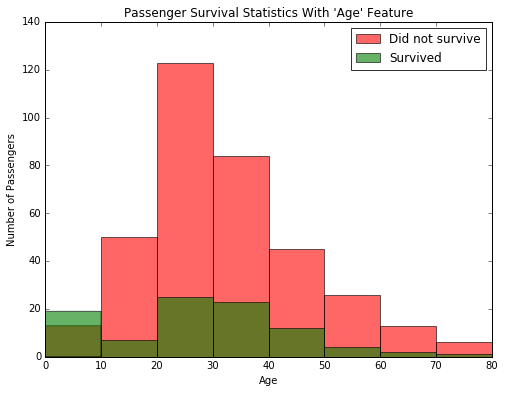

In [156]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [157]:
def predictions_2(data):
    """ Modelo com dois atributos: 
            - Estimar a sobrevivência do passageiro se ele for do gênero feminino.
            - Estimar a sobrevivência do passageiro se ele for do gênero masculino e mais jovem do que 10 anos de idade. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female' or passenger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Retornar nossas estimativas
    return pd.Series(predictions)

# Fazer as estimativas
predictions = predictions_2(data)

In [158]:
print accuracy_score(outcomes, predictions)

Estimativas têm uma precisão de 79.35%.


# Criação de novos parametros

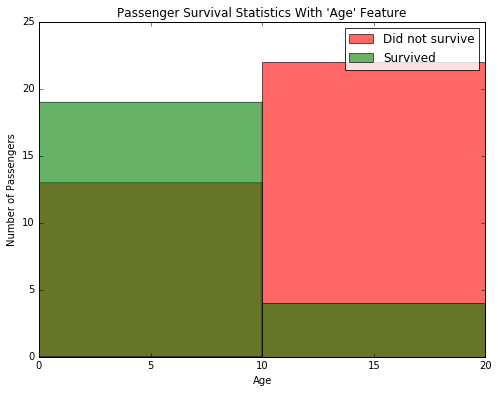

In [159]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

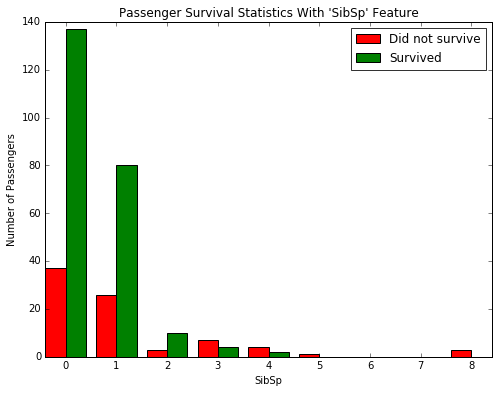

In [160]:
def predictions_3(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif passenger['Age'] < 18 and passenger['Pclass'] in (1,2):
            predictions.append(1)
        elif passenger['Parch'] > 2:
            predictions.append(0)
        elif passenger['Fare'] > 250:
            predictions.append(1)
        elif passenger['SibSp'] > 1 and passenger['Sex'] == 'male':
            predictions.append(0)
        else:
            predictions.append(0)
    
    # Retornar estimativas
    return pd.Series(predictions)

# Faz as estimativas
predictions = predictions_3(data)

survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'"])

# Estimando a acuracia do modelo em questão

In [161]:
print accuracy_score(outcomes, predictions)

Estimativas têm uma precisão de 80.02%.


# Conclusão

## Esse foi um modelo simples de machine learning com base em arvore de decisão. A árvore de decisão separa um conjunto de dados em pedaços cada vez menores.

## A àrvore de decisão é apenas um de muitos modelos que vem da aprendizagem supervisionada, aonde tentamos utilizar atributos dos dados para estimar ou modelar coisas com resultados objetivos classificados.